In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def n_term_rayleigh(_lamb):
    return (0.23465 + (1.076e2/(146 - _lamb**2)) + (0.93161/(41 - _lamb**2)))**2

def ext_rayleigh(lamb, h=0.2, T=300, P=1.0, Ts=273.15, Ps=1.0):
    """
    h in km
    T in K
    P in atm
    Ts and Ps: Standard Temperature and Pressure
    """
    _lamb = 1.0/lamb
    n_term_squared = n_term_rayleigh(_lamb)
    corr = Ts/T * P/Ps    
    return corr * 9.4977e-3 * _lamb**4 * n_term_squared * np.exp(-h/7.996)

def ext_ozon(lamb):
    """
    1.11 * 0.25 * 2.5 = 0.69375
    lamb ini micrometer
    """
    
    return 0.69375 * (1210 * np.exp(-131*(lamb - 0.26)) + 0.055*np.exp(-188*(lamb - 0.59)**2))

def ext_aerosol(lamb, h=0.2, A0=0.1, alpha=0.8, H=1.5):
    """
    h & H in km
    """
    return A0 * lamb**(-alpha) * np.exp(-h/H)

def total_extinction(lamb, h=0.2):
    A_Rayleigh = ext_rayleigh(lamb, h)
    A_Ozon = ext_ozon(lamb)
    A_Aerosol = ext_aerosol(lamb, h)
    return A_Rayleigh + A_Ozon + A_Aerosol

In [3]:
lamb = 1e-4 * np.linspace(3000, 8000, 5001) # in micrometer
lamb

array([0.3   , 0.3001, 0.3002, ..., 0.7998, 0.7999, 0.8   ])

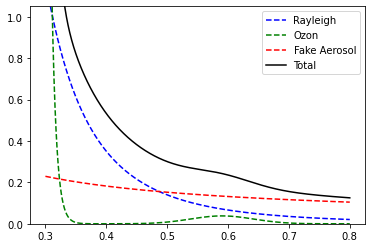

In [4]:
plt.plot(lamb, ext_rayleigh(lamb), 'b--', label="Rayleigh")
plt.plot(lamb, ext_ozon(lamb), 'g--', label="Ozon")
plt.plot(lamb, ext_aerosol(lamb), 'r--', label="Fake Aerosol")
plt.plot(lamb, total_extinction(lamb), 'k-', label="Total")
plt.ylim([0,1.05])
plt.legend()